<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [16]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [17]:
reader = csv.DictReader(open('./sat_scores.csv'))

data = {}
for row in reader:
    for column, value in row.items():
        data.setdefault(column, []).append(value)
print (data)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

In [18]:
data1 = {key: [float(element) if element.isdigit() else element for element in value] for key, value in data.items()}
data1

{'Math': [510.0,
  513.0,
  515.0,
  505.0,
  516.0,
  499.0,
  499.0,
  506.0,
  500.0,
  501.0,
  499.0,
  510.0,
  499.0,
  489.0,
  501.0,
  488.0,
  474.0,
  526.0,
  499.0,
  527.0,
  499.0,
  515.0,
  510.0,
  517.0,
  525.0,
  515.0,
  542.0,
  439.0,
  539.0,
  512.0,
  542.0,
  553.0,
  542.0,
  589.0,
  550.0,
  545.0,
  572.0,
  589.0,
  580.0,
  554.0,
  568.0,
  561.0,
  577.0,
  562.0,
  596.0,
  550.0,
  570.0,
  603.0,
  582.0,
  599.0,
  551.0,
  514.0],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [19]:
sat_scores = pd.read_csv('./sat_scores.csv')
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [20]:
# Comments: I've changed the data type for SAT dictionary in qn 1.1.
sat_scores_dict = pd.DataFrame(data1)
sat_scores_dict.dtypes

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [21]:
sat_scores.shape

(52, 4)

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [22]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


- State: It represents the 51 states in the US.
- Rate: The student participation rate from each state.
- Verbal: Scores for Verbal section of the SAT.
- Math: Scores for Math section of the SAT.

In [23]:
sat_scores.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [24]:
sat_scores = sat_scores.drop([51])
# Reason: My guess is, it's the average of the columns respectively among the 51 states across US.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [25]:
sat_scores.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [26]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [27]:
sat_scores.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [28]:
sat_scores.shape

(51, 4)

In [29]:
sat_scores.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5,1,'Student Participation Rate in SAT Across US')

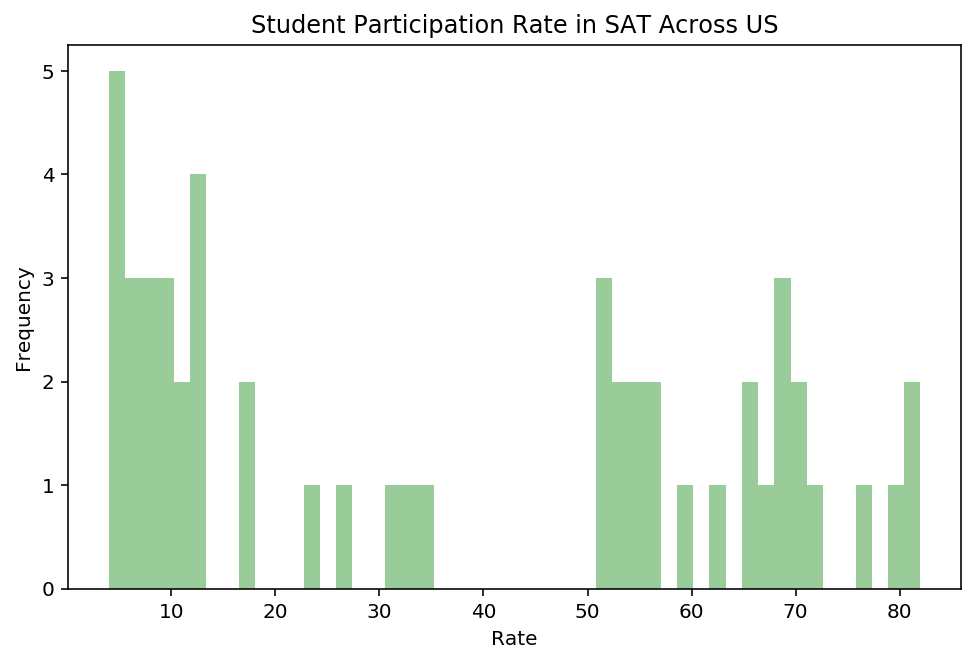

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,5))
sns.distplot(sat_scores['Rate'], kde = False, bins = 50, color = 'g')
plt.ylabel('Frequency')
plt.title('Student Participation Rate in SAT Across US')

Text(0.5,1,'SAT Score for Math Across Various US States')

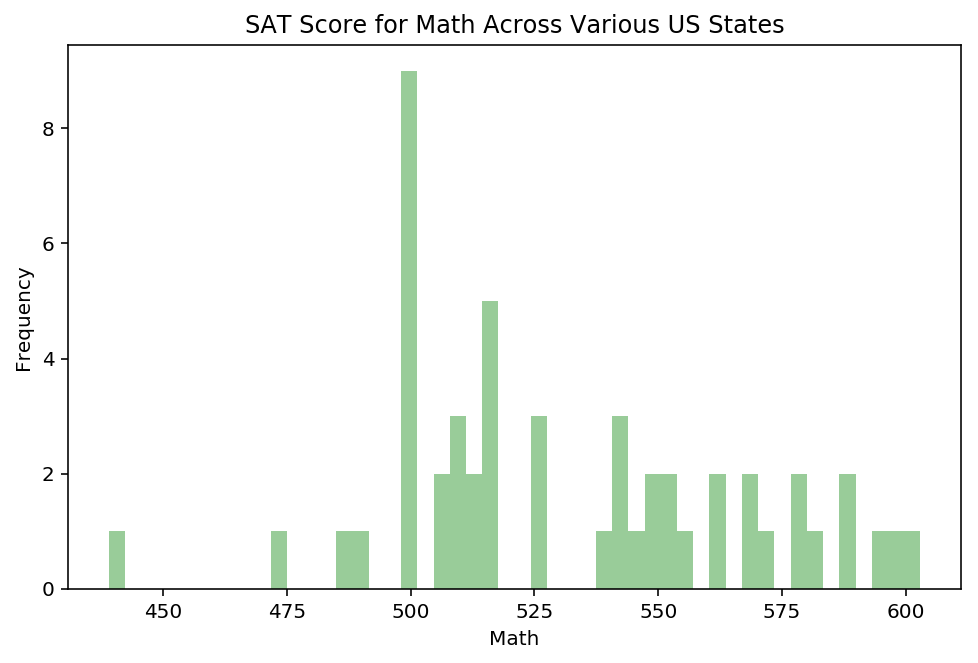

In [32]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.distplot(sat_scores['Math'], kde = False, bins = 50, color = 'g')
plt.ylabel('Frequency')
plt.title('SAT Score for Math Across Various US States')

Text(0.5,1,'SAT Score for Verbal Across Various US States')

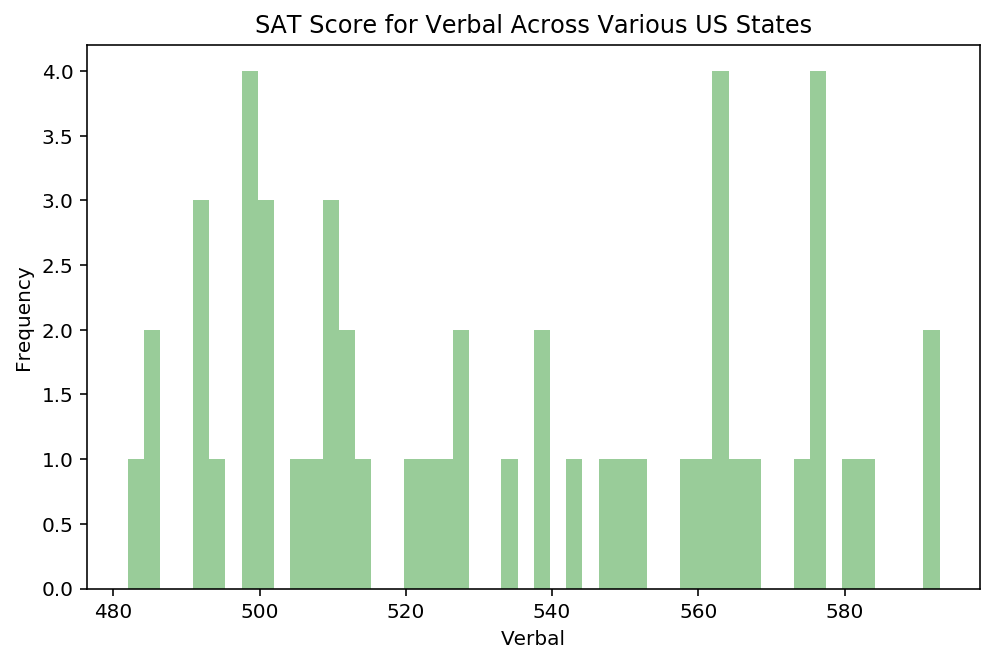

In [33]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.distplot(sat_scores['Verbal'], kde = False, bins = 50, color = 'g')
plt.ylabel('Frequency')
plt.title('SAT Score for Verbal Across Various US States')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

Text(0.5,1.05,'Paired Relationship between Rate, Verbal and Math of SAT Scores Across Various US States')

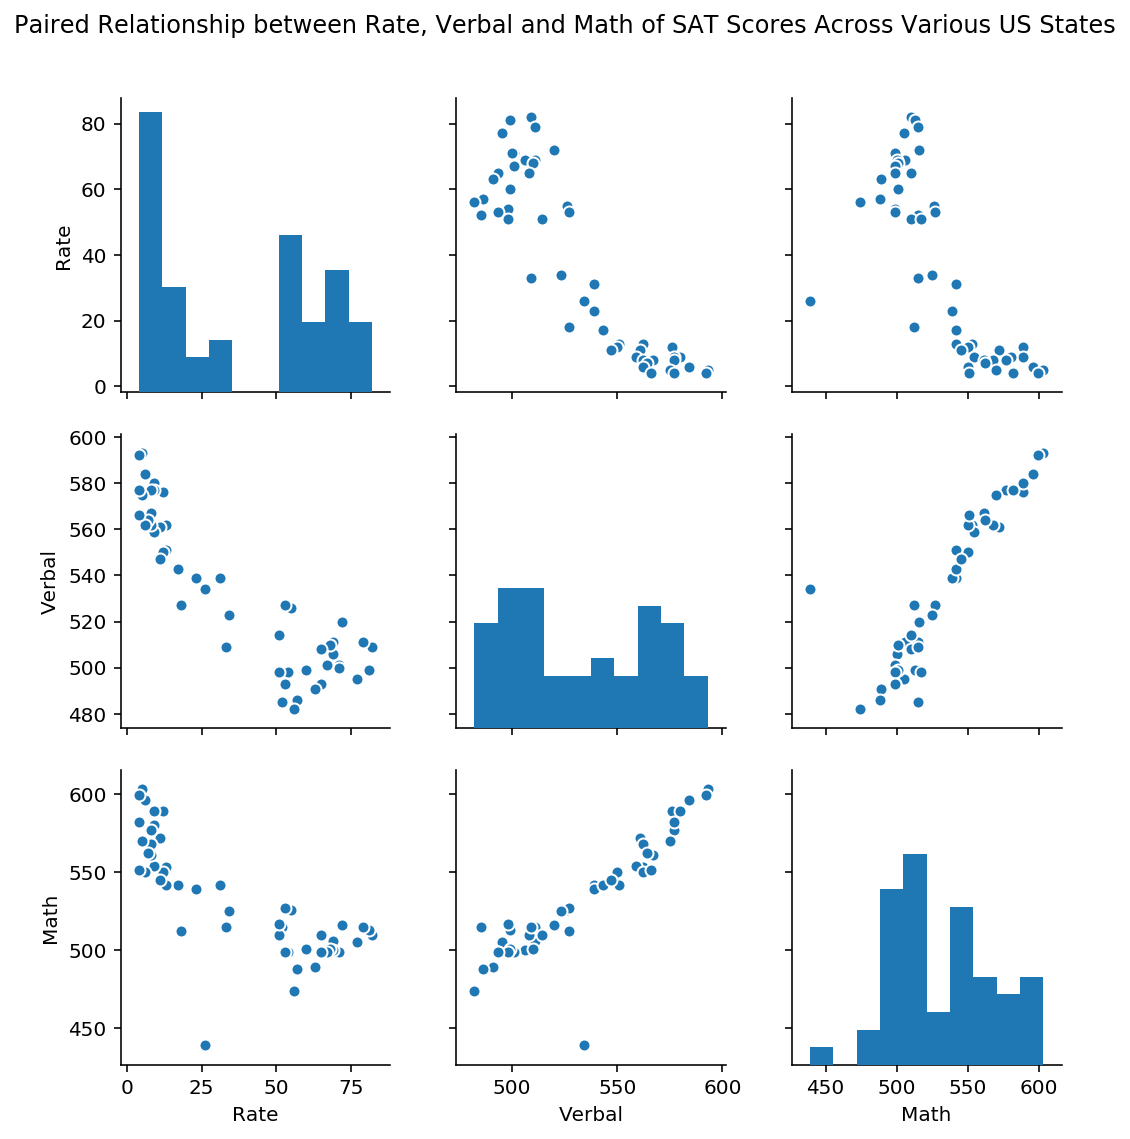

In [40]:
sns.pairplot(sat_scores)
plt.suptitle('Paired Relationship between Rate, Verbal and Math of SAT Scores Across Various US States', y = 1.05)
# Comment: For the student participation rate, there are 2 peaks at the extreme ends, lower and upper range. 
# The differences in the participation rate across the various US states is too widespread. 
# As for the 'Verbal' plot, the bar graph is giving 2 peaks which gives the impression of a bimodal distribution.
# As for the 'Math' plot, the bar graph is showing a skewed distribution slightly to the right. There seems to also 
# have an outlier present in the scatterplot.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

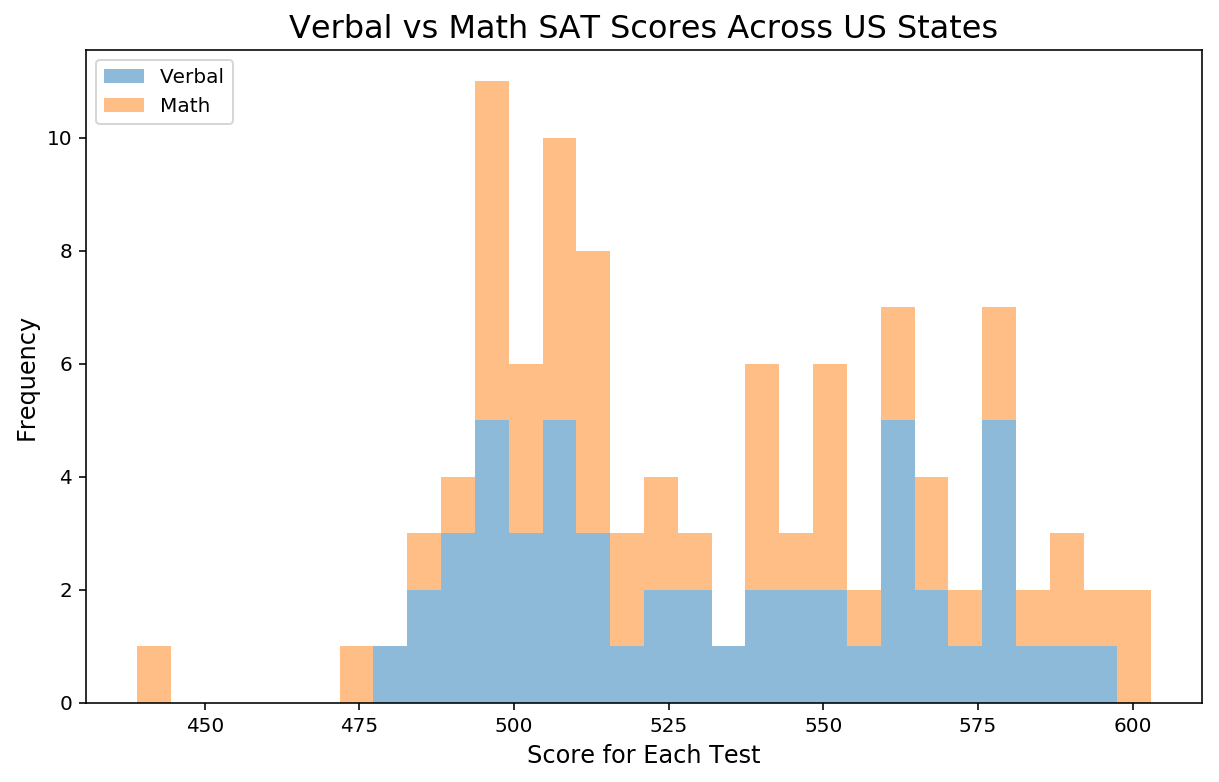

In [41]:
chart = sat_scores[['Verbal', 'Math']].plot.hist(figsize = (10,6), x = sat_scores['State'], stacked = True, bins=30, alpha = 0.5)
chart.set_title ('Verbal vs Math SAT Scores Across US States', fontsize = 16)
chart.set_xlabel ('Score for Each Test', fontsize = 12)
chart.set_ylabel ('Frequency', fontsize = 12)
chart.legend(loc = 2)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

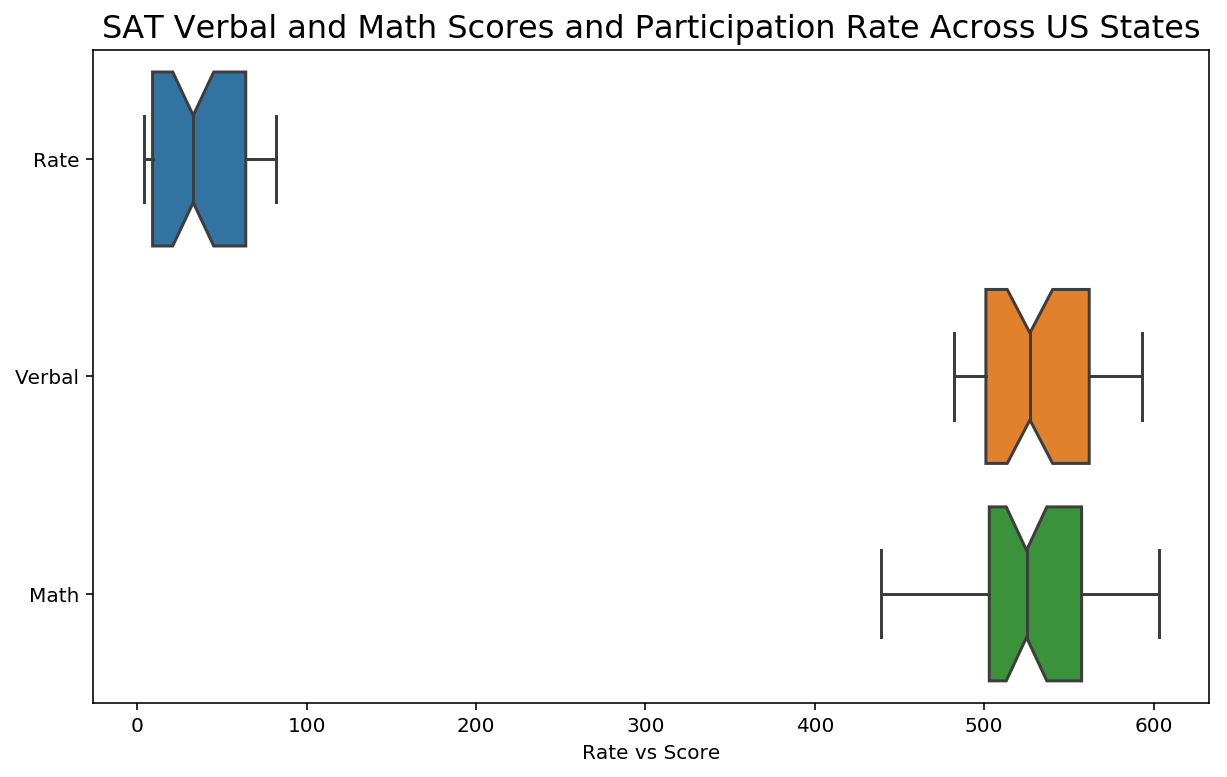

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax = sns.boxplot(data=sat_scores, orient = 'h', fliersize = 5, linewidth = 1.5, notch = True, saturation = 0.75, ax = ax)

ax.set_title ('SAT Verbal and Math Scores and Participation Rate Across US States', fontsize = 16)
ax.set_xlabel('Rate vs Score')

plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [43]:
# Comments:
# - I dropped the column 'Rate' as I assume it's within 0-100 percentage range. 
# - Only the 'Verbal' and 'Math' scores are plotted as the range of the scores don't really differ much.

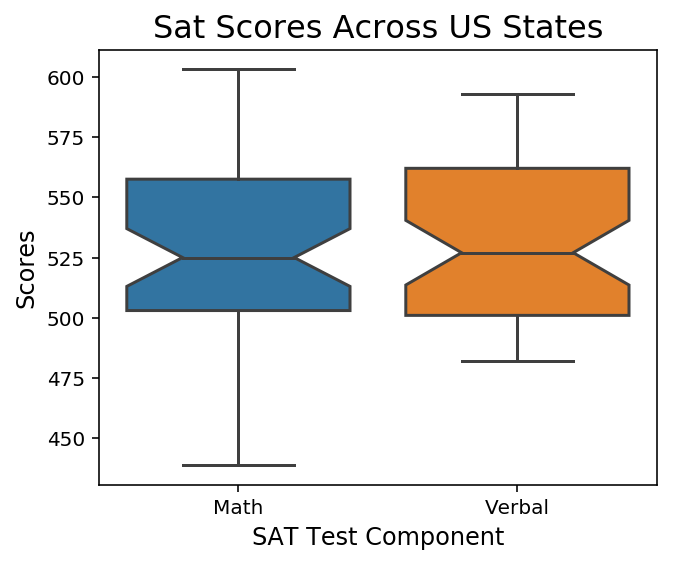

In [44]:
sat_scores1 = sat_scores[['State','Math','Verbal']]
fig = plt.figure(figsize=(5,4))
ax = fig.gca()

ax = sns.boxplot(data = sat_scores1, orient = 'v', fliersize = 5, linewidth = 1.5, notch = True, saturation = 0.75, ax = ax)

ax.set_title ('Sat Scores Across US States', fontsize = 16)
ax.set_ylabel('Scores', fontsize = 12)
ax.set_xlabel('SAT Test Component', fontsize = 12)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [45]:
data = sat_scores.loc[:, ['State', 'Verbal']] [(sat_scores['Verbal'] > np.mean(sat_scores['Verbal']))]
data

,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


In [46]:
data.count()
# Comment: There are 24 out of a total of 51 states that have Verbal scores more than the average. 
# Comment: As the number of states is almost half of the total, it actually tells that the distribution is symmetrical
#          but from 3.2's pairplot the graph for Verbal shows extreme results which depicts some states in the lower end of
#          the score range while some states are in the upper end of the score range. 

State     24
Verbal    24
dtype: int64

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [47]:
data1 = (sat_scores[(sat_scores['Verbal'] > np.median(sat_scores['Verbal']))]) [['State', 'Verbal']]
data1.head()

,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562


In [48]:
data1.count()

State     24
Verbal    24
dtype: int64

In [49]:
# Comment: The result is the same as the previous question. There is no significant difference and results are telling me
#          that the distribution is symmetrical when it's actually not. When referred to the 3.2 pairplot graphs,
#          the Verbal scores shows 2 peaks at 2 ends of the score range. Hence more test should be done as the distribution
#          is definitely not symmetrical.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [50]:
sat_scores['Diff'] = sat_scores['Verbal'] - sat_scores ['Math']
sat_scores.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [51]:
# Qn 1
data_gap1 = sat_scores.sort_values(['Diff'], ascending = False).head(10)
data_gap1

,State,Rate,Verbal,Math,Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
31,TN,13,562,553,9
9,VA,68,510,501,9
32,NM,13,551,542,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [52]:
# Qn 2
data_gap2 = sat_scores.sort_values(['Diff'], ascending = True).head(10)
data_gap2

,State,Rate,Verbal,Math,Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
49,ND,4,592,599,-7


In [53]:
# Qn3: Top 3 states where Verbal score is higher than Math: Ohio, Mississippi and West Virginia
data_gap1[['State', 'Verbal', 'Math']].head(3)

,State,Verbal,Math
27,OH,534,439
50,MS,566,551
29,WV,527,512


In [54]:
# Qn 3: Top 3 states where Math score is higher than Verbal: Hawaii, California and New Jersey 
data_gap2[['State', 'Verbal', 'Math']].head(3)

,State,Verbal,Math
21,HI,485,515
23,CA,498,517
1,NJ,499,513


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [55]:
data_corr = sat_scores[['Rate','Verbal','Math', 'Diff']].corr()
data_corr

,Rate,Verbal,Math,Diff
Rate,1.000000,-0.888121,-0.773419,-0.098671
Verbal,-0.888121,1.000000,0.899909,0.044527
Math,-0.773419,0.899909,1.000000,-0.395574
Diff,-0.098671,0.044527,-0.395574,1.000000


In [59]:
# Comments: There seems to be a positive correlation between Verbal and Math scores of the SAT test.
# As one component changes in a direction, the other component also moves in the same direction.
# Whereas Rate has negative correlation to both the Verbal and Math scores of the SAT test.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [60]:
sat_scores.describe()

,Rate,Verbal,Math,Diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [61]:
# Comments: 
# Count refers to the total number of inputs which represents the data from 51 states across US.
# Mean: Average of all the dataset respectively.
# Std: Standard deviation of each of the column in the dataset.
# Min: It represents the minimum data input from each column.
# 25%: Data that is in the 25th percentile.
# 50%: Data that is in the 50th percentile.
# 75%: Data that is in the 75th percentile.
# Max: It represents the maximum data input from each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [62]:
sat_scores.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


In [63]:
data_covar = sat_scores.cov()
data_covar

,Rate,Verbal,Math,Diff
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Diff,-43.06,23.529412,-227.370196,250.899608


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [64]:
drug_use = pd.read_csv('./drug-use-by-age.csv')
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [65]:
# Replace the cells '-' with NaN values
drug_use = drug_use.replace('-', np.nan)
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [66]:
drug_use.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [67]:
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [68]:
drug_use [['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']] = drug_use[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']].apply(pd.to_numeric, errors = 'coerce')
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [69]:
# Columns with errors in spelling were renamed, otherwise the rest remain the same.
drug_use = drug_use.rename(columns = {'pain-releiver-use':'pain-reliever-use', 'pain-releiver-frequency': 'pain-reliever-frequency'})

In [70]:
drug_use.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-reliever-use', 'pain-reliever-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [71]:
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [72]:
# Comments:
# In the US, the legal age limit for alcohol consumption for on-premise is 21 yrs old
# sources: http://www.iard.org/resources/minimum-legal-age-limits/

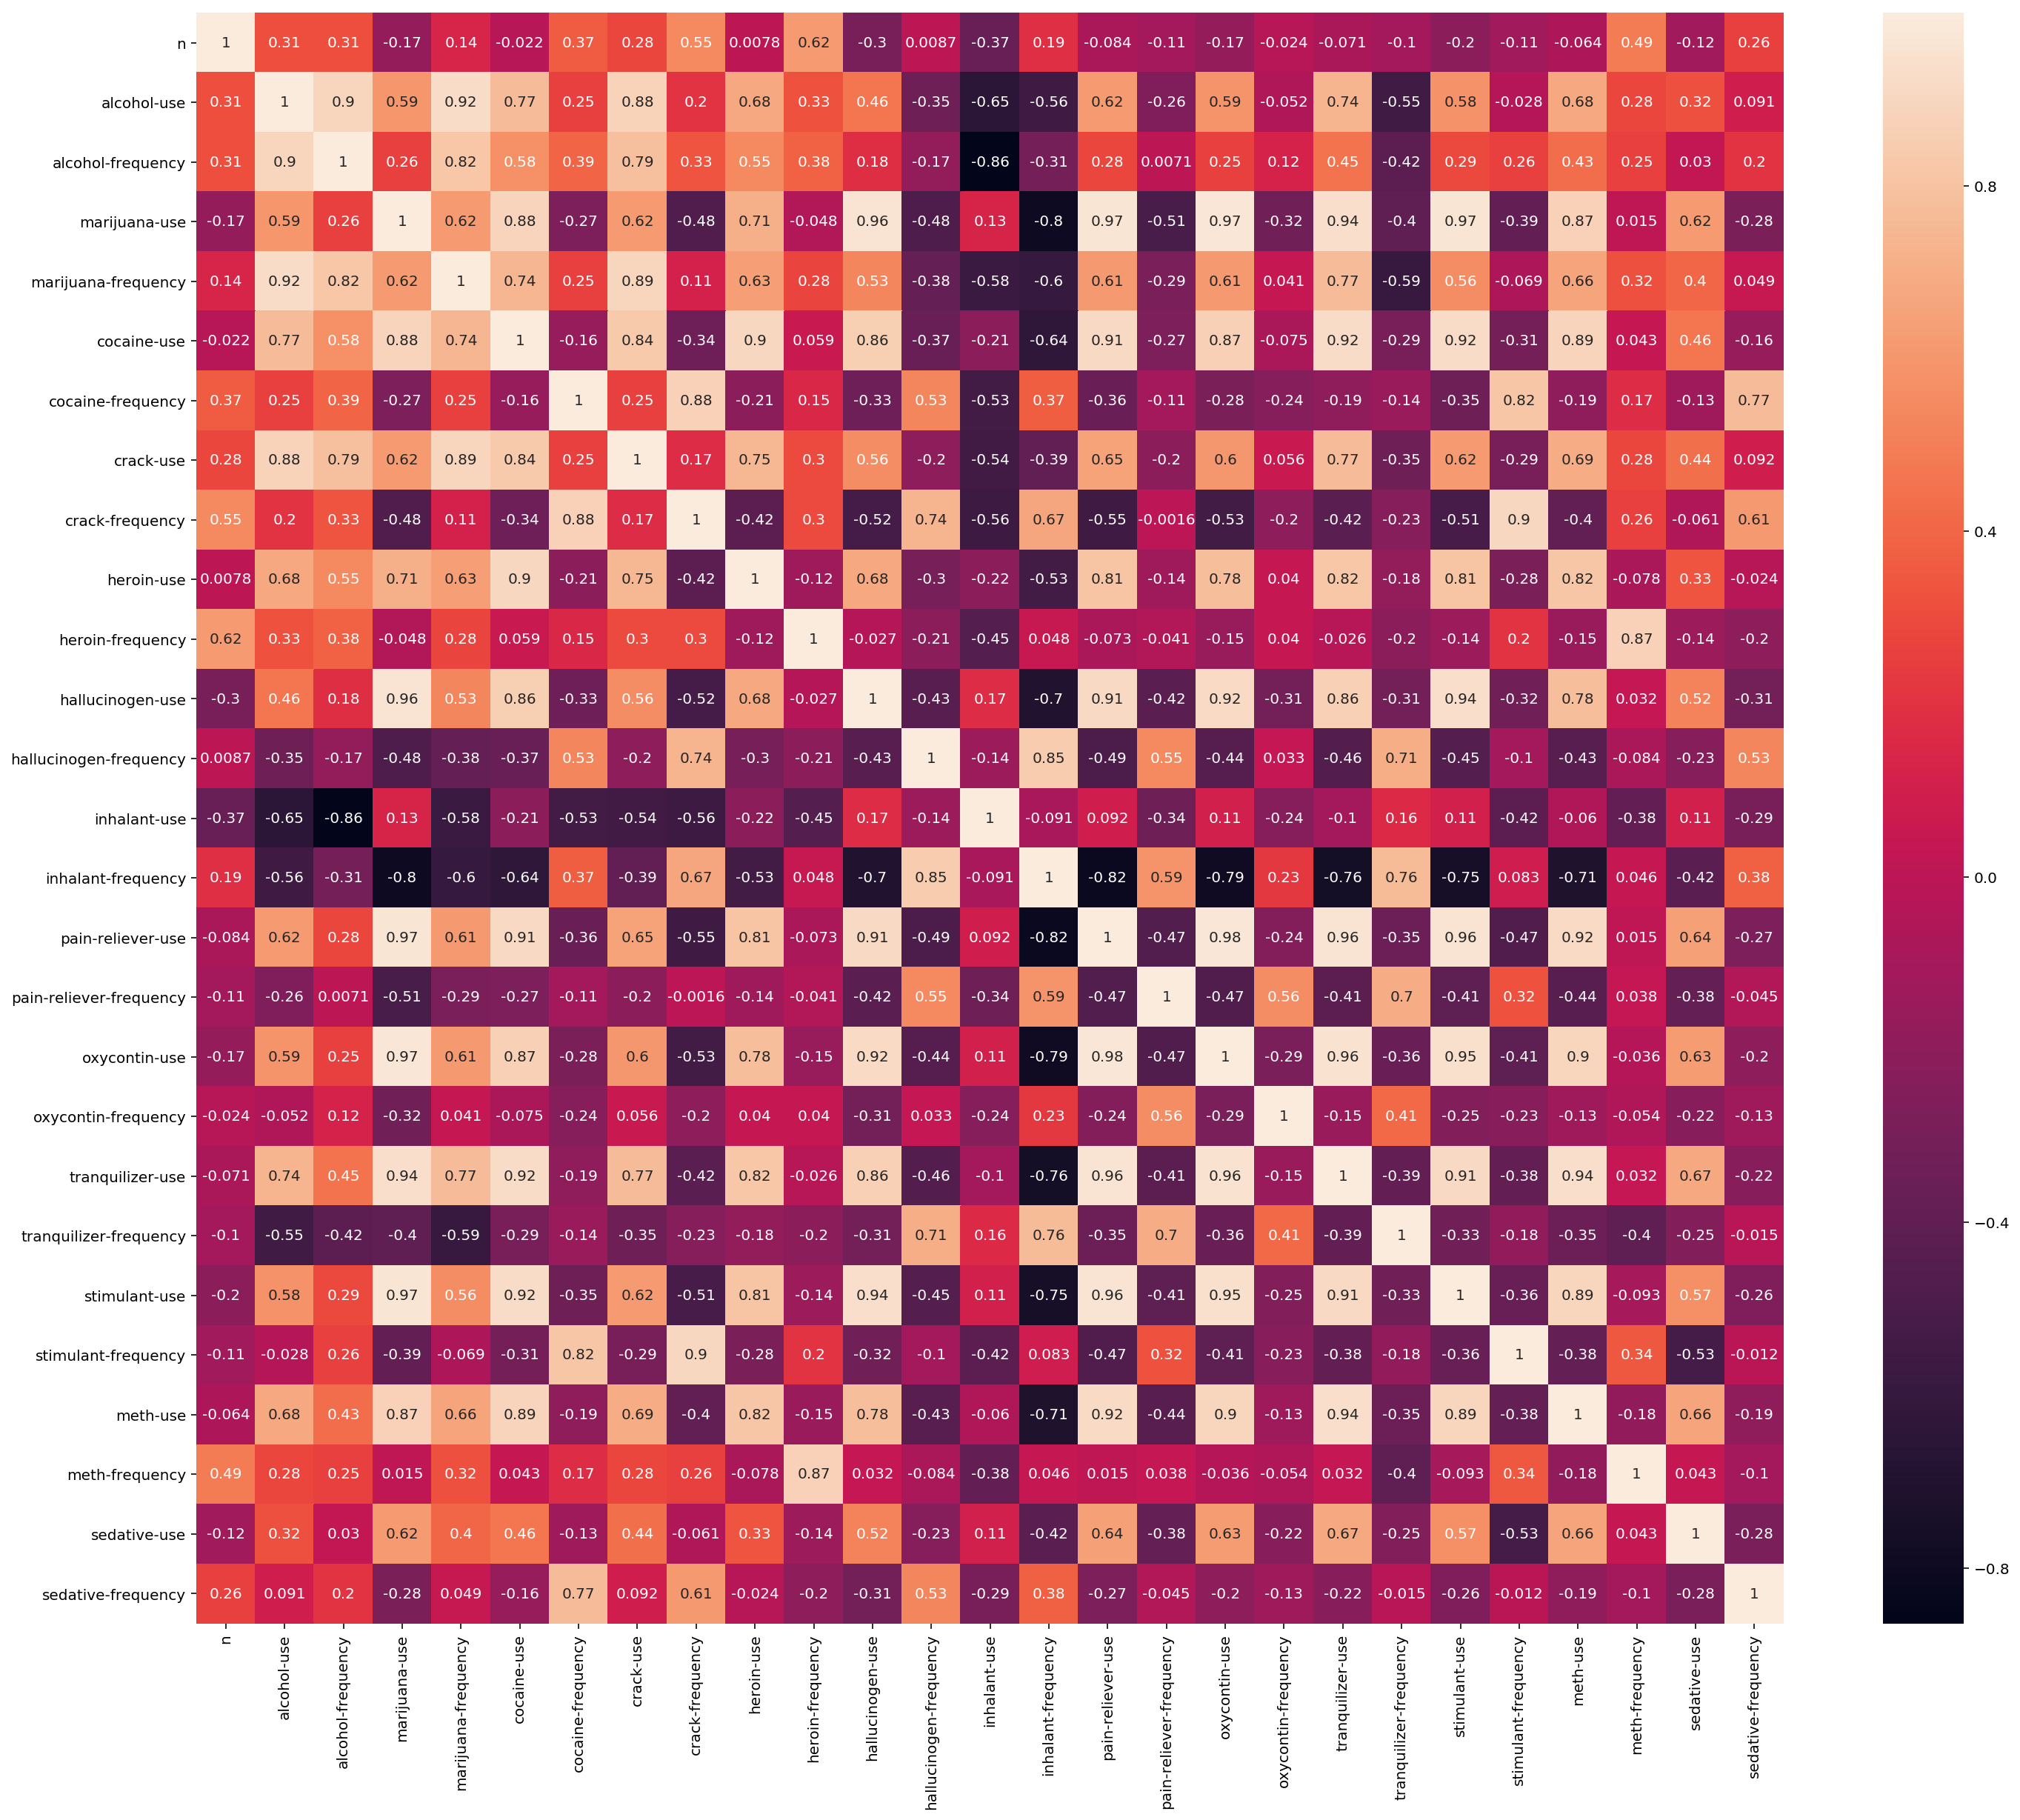

In [73]:
# Correlation in general in the drug_use dataset. Is there any correlation between 2 different drug usage and 
# frequencies in drug usage? Is there any relation between age and preference in type of drug usage?
plt.figure(figsize = (24,20))
sns.heatmap(drug_use.corr(), annot = True)

In [74]:
# Filtering data, frequencies of drug use only.
drug_freq_only= drug_use[['age', 'n', 'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency',
       'crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency', 'pain-reliever-frequency', 
    'oxycontin-frequency',  'tranquilizer-frequency','stimulant-frequency', 'meth-frequency', 'sedative-frequency']]
drug_freq_only.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-reliever-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,2798,3.0,4.0,5.0,NaN,35.5,52.0,19.0,36.0,24.5,52.0,2.0,NaN,13.0
1,13,2757,6.0,15.0,1.0,3.0,NaN,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792,5.0,24.0,5.5,NaN,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


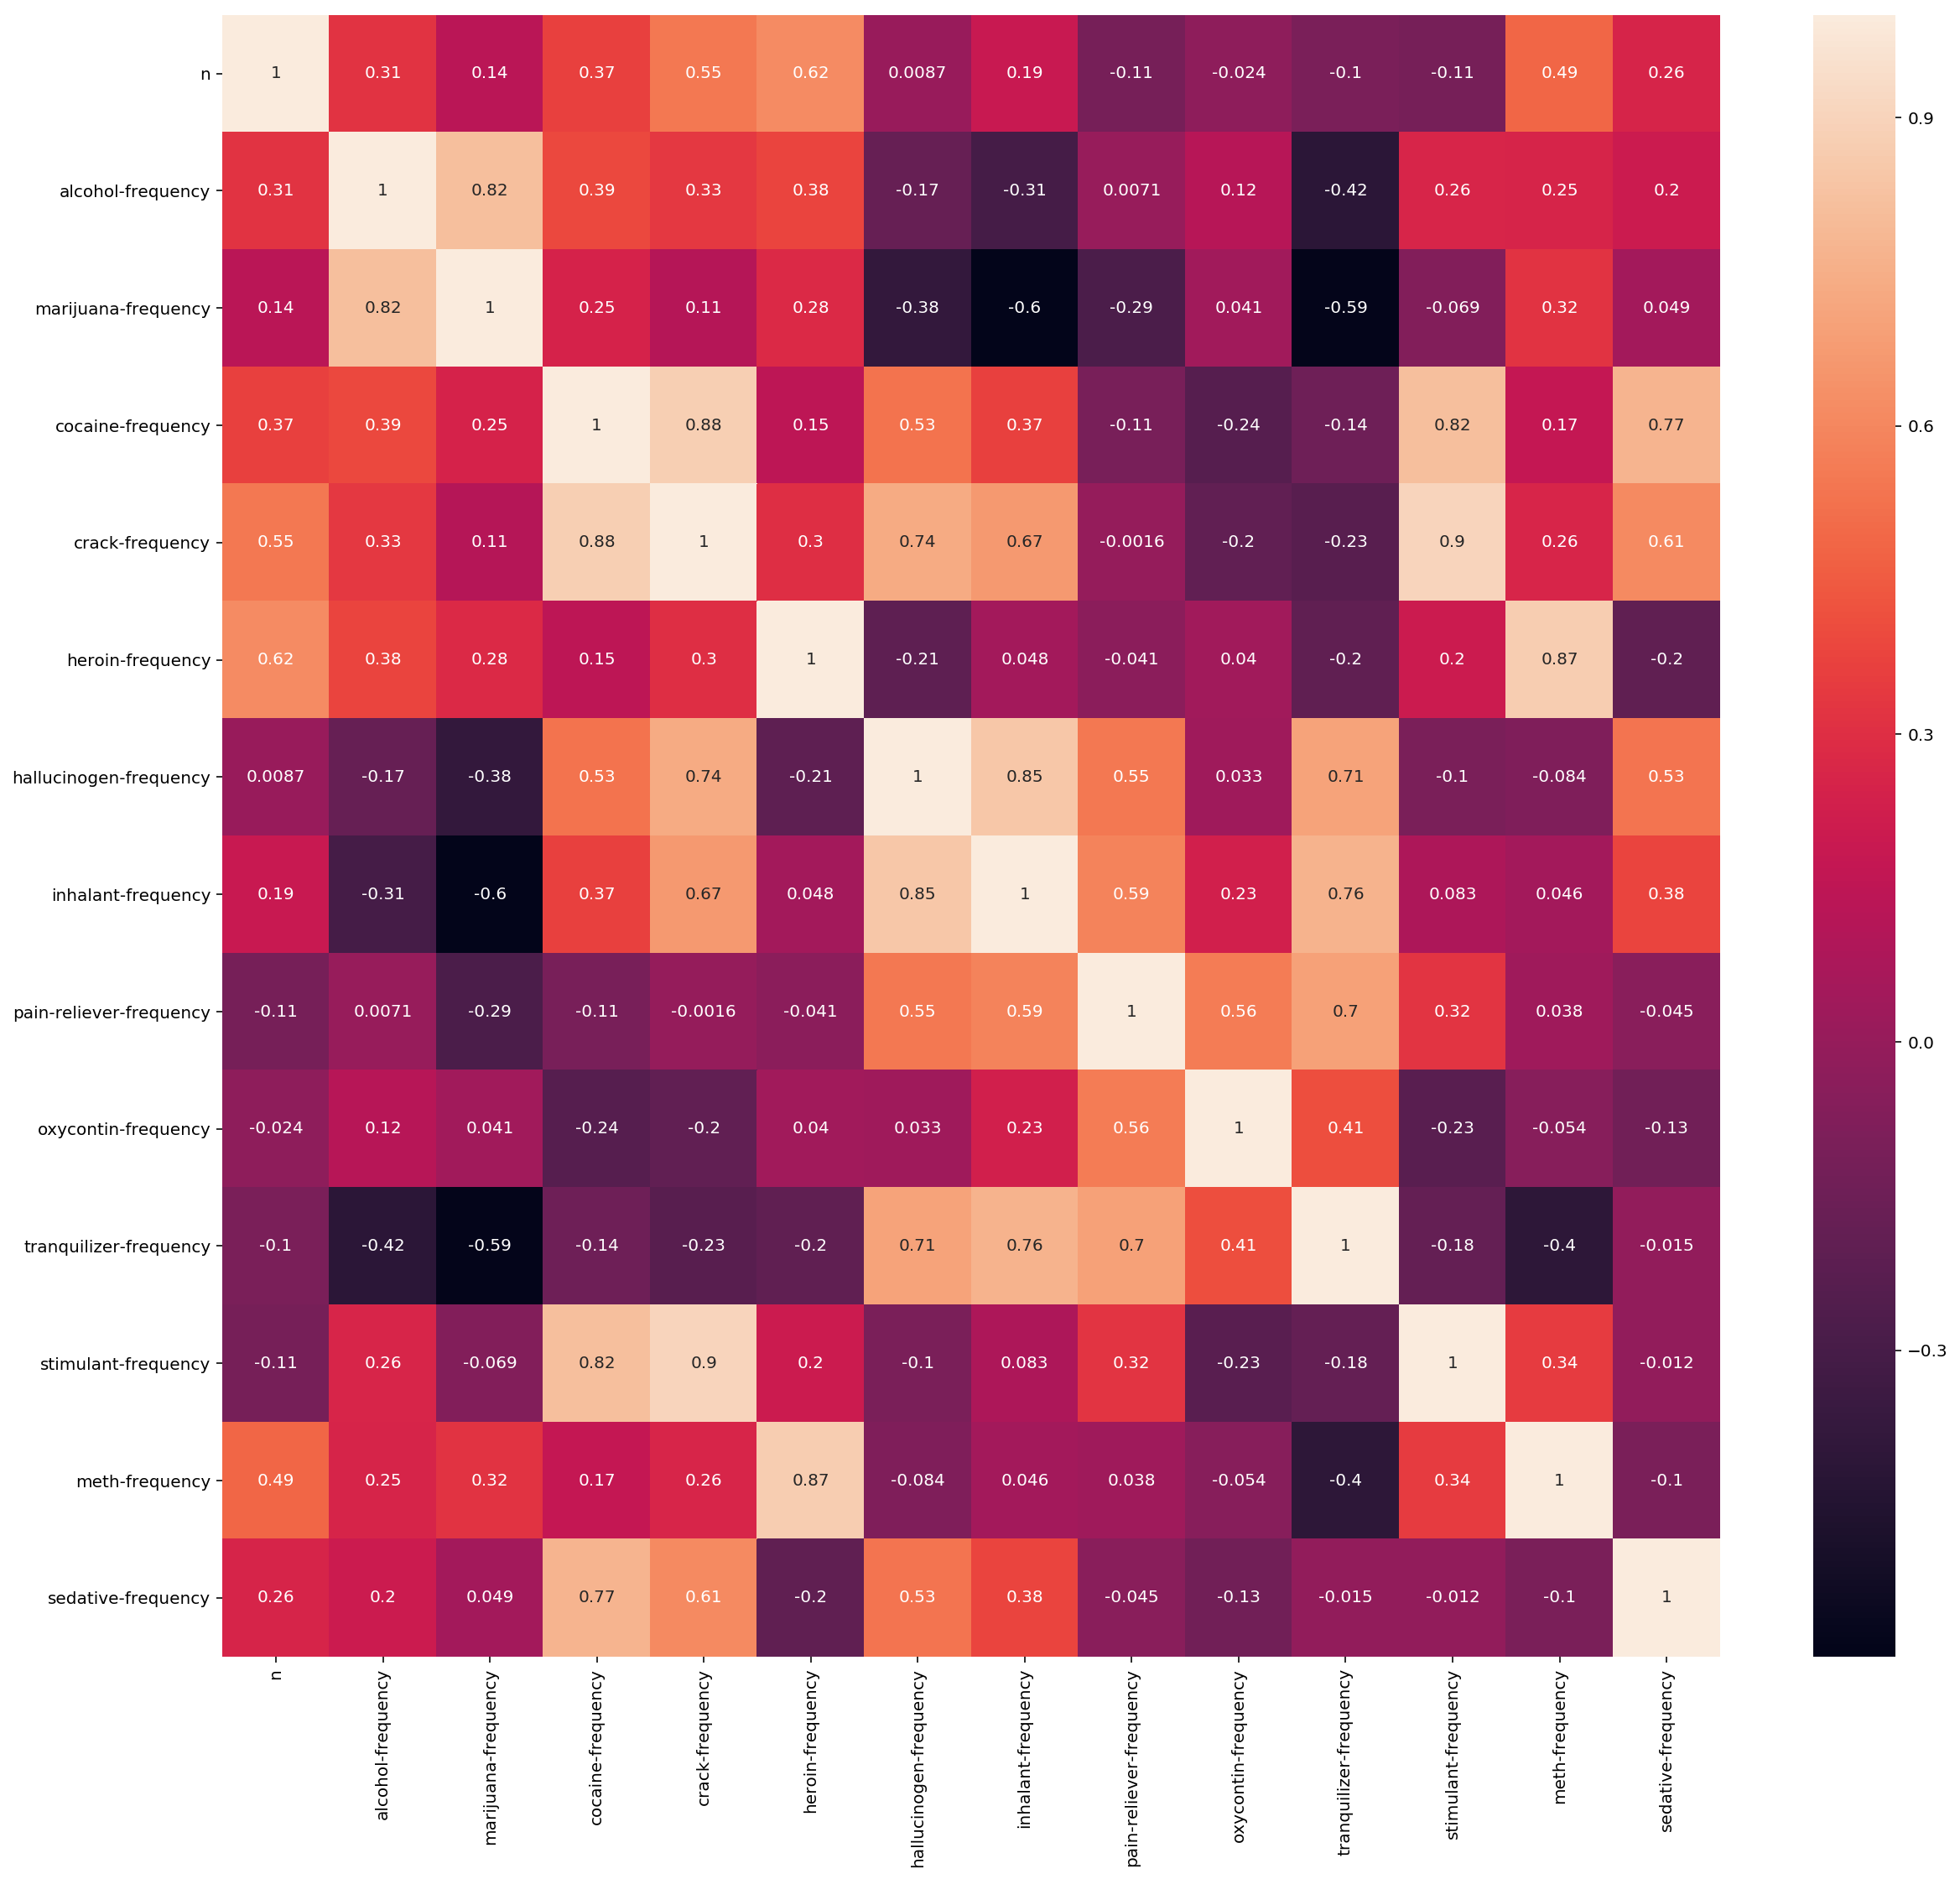

In [75]:
# Correlation of different frequencies of various drugs used.
drug_freq_only.corr()
plt.figure(figsize = (20,18))
sns.heatmap(drug_freq_only.corr(), annot = True)

In [76]:
# Filtering data containing only types of drug uses.
drug_use_only = drug_use[['age', 'n', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use','pain-reliever-use','oxycontin-use', 'tranquilizer-use',
       'stimulant-use','meth-use', 'sedative-use']]
drug_use_only.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [77]:
drug_use_only.describe()

,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,1297.890426,26.878866,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,2223.000000,3.900000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,2469.000000,40.100000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,2798.000000,64.600000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,3058.000000,77.500000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,7391.000000,84.200000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [78]:
# Here, I'm experimenting with the age group and the type of drug used by different age groups.
# I categorized under 21 as Group 1: underage users, 21-49 as Group 2: adult users as well as 50 years old and beyond as 
# Group 3: elder users.

def func (x):
    if x < '21':
        return float (1)
    if x >= '21' and x < '50':
        return float (2)
    else:
        return float (3)
    
drug_use_only['Group'] = drug_use_only['age'].apply(func)
drug_use_only

C:\Users\syami\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,Group
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2,1.0
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1,1.0
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2,1.0
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4,1.0
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2,1.0
5,17,3038,49.3,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5,1.0
6,18,2469,58.7,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4,1.0
7,19,2223,64.6,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3,1.0
8,20,2271,69.7,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5,1.0
9,21,2354,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3,2.0


In [79]:
drug_use_only1 = drug_use_only.groupby('Group').mean()
drug_use_only1

,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
Group,,,,,,,,,,,,,,
1.0,2706.888889,38.011111,19.922222,1.777778,0.188889,0.266667,3.966667,2.10,6.344444,0.977778,2.644444,1.966667,0.355556,0.311111
2.0,4089.166667,80.616667,22.316667,3.350000,0.483333,0.583333,3.600000,0.75,7.733333,1.116667,3.716667,2.433333,0.516667,0.300000
3.0,3185.500000,58.250000,4.250000,0.450000,0.200000,0.050000,0.200000,0.10,1.550000,0.200000,0.800000,0.150000,0.100000,0.100000


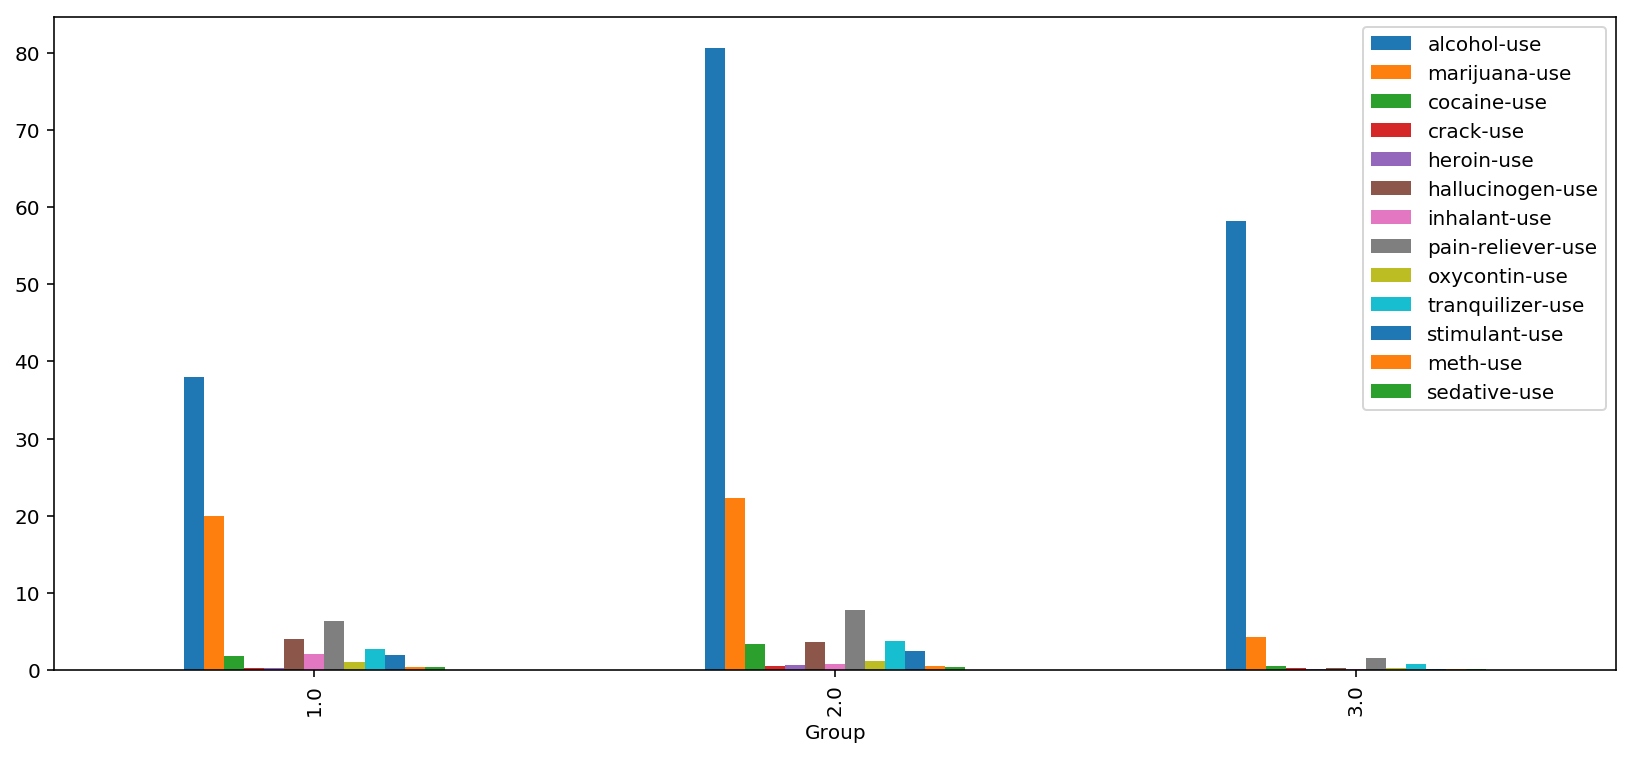

In [80]:
chart = drug_use_only1[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use',
       'heroin-use', 'hallucinogen-use', 'inhalant-use','pain-reliever-use','oxycontin-use', 'tranquilizer-use',
       'stimulant-use','meth-use', 'sedative-use']].plot(kind = 'bar', figsize = (14,6))

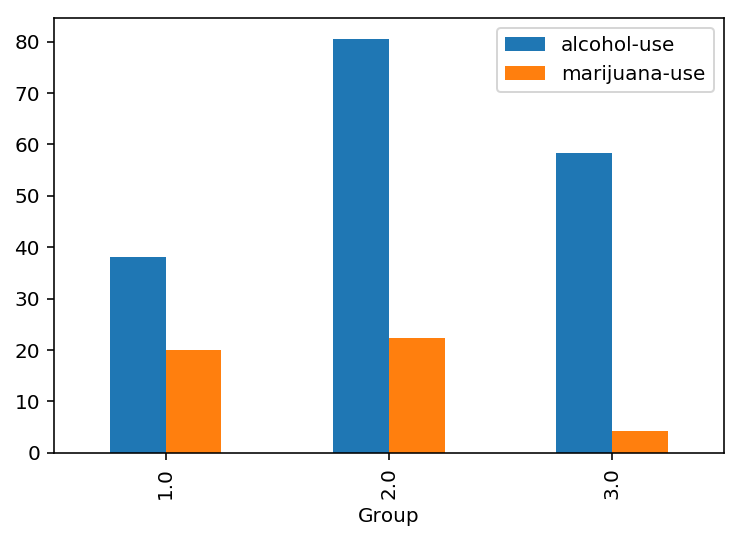

In [81]:
chart1 = drug_use_only1[['alcohol-use', 'marijuana-use']].plot(kind = 'bar')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [82]:
# Code
# H0 = No preference between alcohol and marijuana uses for those ages between 12-20
# H1 = There is preference between alcohol and marijuana uses for those ages between 12-20
grp1 = drug_use_only.loc[0:8,'alcohol-use'].values
grp2 = drug_use_only.loc[0:8,'marijuana-use'].values

sample_diff = np.mean(grp1) - np.mean(grp2)

var = (sum(np.square(grp1 - np.mean(grp1))) + sum(np.square(grp2 - np.mean(grp2)))) / (len(grp1) + len (grp2) - 2)

t = sample_diff / (np.sqrt(var*((1./len(grp1)) + (1./len(grp2)))))
print (t)

1.9487341226775388


In [83]:
t_stat, p_value = stats.ttest_ind(grp1,grp2)
print('t-statistic={}, p-value={}'.format(t_stat, p_value))

t-statistic=1.9487341226775388, p-value=0.069084647852992


- p-value = 0.069 > 0.05
- We reject H1. Hence we cannot reject H0 as there is no preference between alcohol and marijuana uses for those ages between 12-20.

In [84]:
# H0 = No preference between alcohol and marijuana uses for those ages between 21-49
# H1 = There is preference between alcohol and marijuana uses for those ages between 21-49

grp1 = drug_use_only.loc[9:14,'alcohol-use'].values
grp2 = drug_use_only.loc[9:14,'marijuana-use'].values

sample_diff = np.mean(grp1) - np.mean(grp2)

var = (sum(np.square(grp1 - np.mean(grp1))) + sum(np.square(grp2 - np.mean(grp2)))) / (len(grp1) + len (grp2) - 2)

t = sample_diff / (np.sqrt(var*((1./len(grp1)) + (1./len(grp2)))))
print (t)

15.885368568029035


In [85]:
t_stat, p_value = stats.ttest_ind(grp1,grp2)
print('t-statistic={}, p-value={}'.format(t_stat, p_value))

t-statistic=15.885368568029035, p-value=2.0125733398206747e-08


- p-value = 8.43e-08 < 0.05.
- We reject H0, accept H1. This means those ages 21-49 show preference between alcohol and marijuana uses.

In [86]:
# H0 = No preference between alcohol and marijuana uses for those ages 50 years old and above
# H1 = There is preference between alcohol and marijuana uses for those ages 50 years old and above

grp1 = drug_use_only.loc[15:,'alcohol-use'].values
grp2 = drug_use_only.loc[15:,'marijuana-use'].values

sample_diff = np.mean(grp1) - np.mean(grp2)

var = (sum(np.square(grp1 - np.mean(grp1))) + sum(np.square(grp2 - np.mean(grp2)))) / (len(grp1) + len (grp2) - 2)

t = sample_diff / (np.sqrt(var*((1./len(grp1)) + (1./len(grp2)))))
print (t)

5.711009151130781


In [87]:
t_stat, p_value = stats.ttest_ind(grp1,grp2)
print('t-statistic={}, p-value={}'.format(t_stat, p_value))

t-statistic=5.711009151130781, p-value=0.02931847430317356


- p-value = 0.029 < 0.05.
- We reject H0, accept H1. This means those ages 50 and above show preference between alcohol and marijuana uses.

**Report**



...

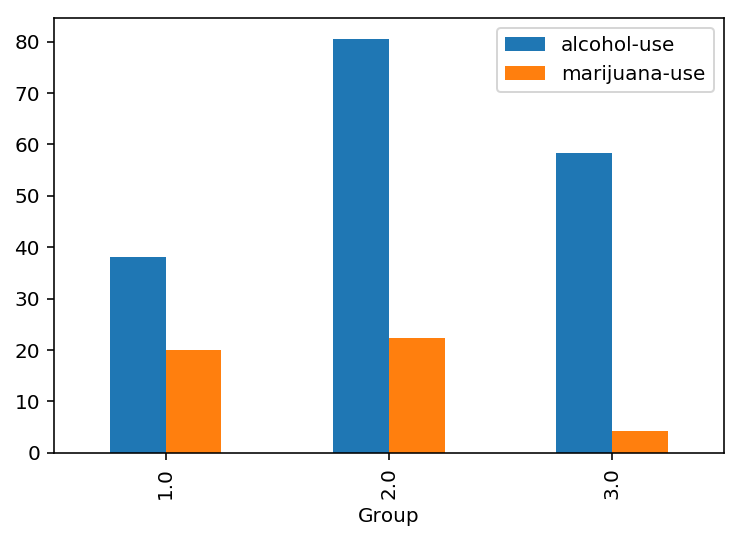

In [88]:
chart1 = drug_use_only1[['alcohol-use', 'marijuana-use']].plot(kind = 'bar')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [89]:
sat_scores1 = sat_scores[['State', 'Verbal', 'Math']]
sat_scores1.head()

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513
2,MA,511,515
3,NY,495,505
4,NH,520,516


In [90]:
sat_scores1.describe()

,Verbal,Math
count,51.000000,51.000000
mean,532.529412,531.843137
std,33.360667,36.287393
min,482.000000,439.000000
25%,501.000000,503.000000
50%,527.000000,525.000000
75%,562.000000,557.500000
max,593.000000,603.000000


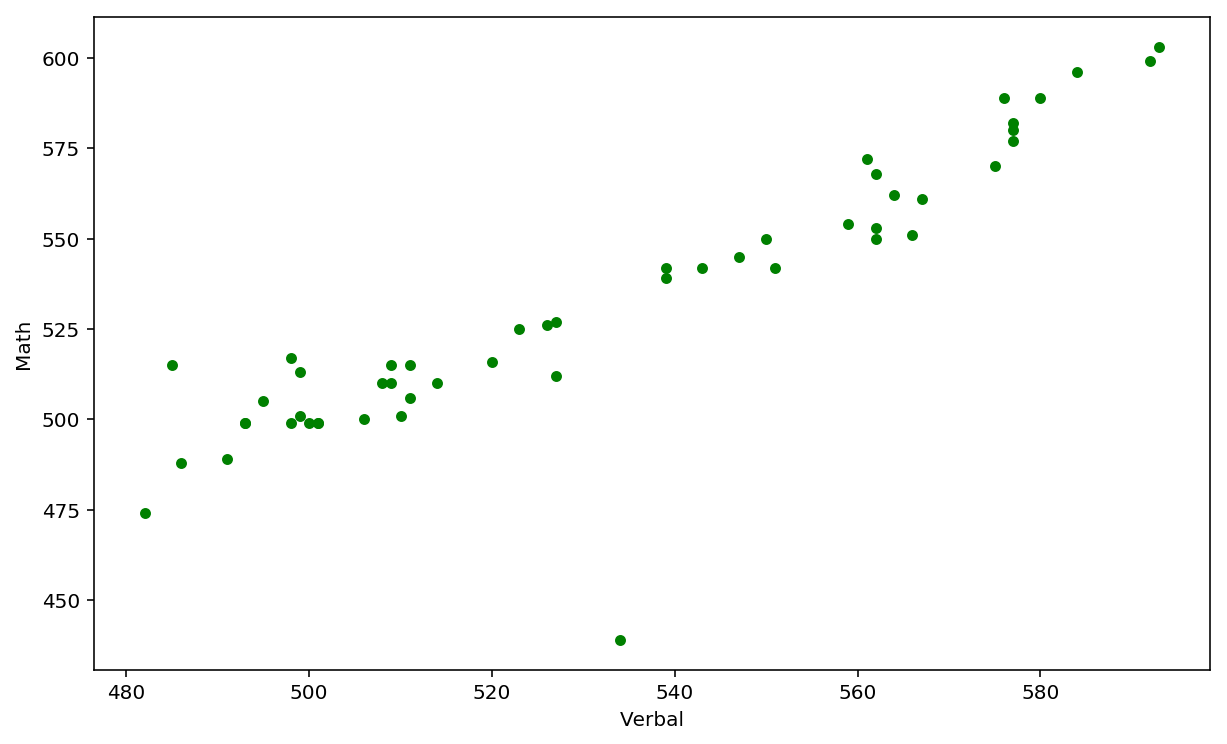

In [91]:
sat_scores2 = sat_scores[['State', 'Verbal', 'Math']]
sat_scores2.plot.scatter(x = 'Verbal', y = 'Math', c = 'g', figsize = (10, 6))

In [92]:
outliers = sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean() + 3 * sat_scores['Verbal'].std()]
outliers

,State,Rate,Verbal,Math,Diff


In [93]:
outliers = sat_scores[sat_scores['Math'] > sat_scores['Math'].mean() + 3 * sat_scores['Math'].std()]
outliers

,State,Rate,Verbal,Math,Diff


In [94]:
data_per = sat_scores['Math'].sort_values()

Q1,Q3 = np.percentile(data_per, [25,75])

IQR = Q3-Q1
IQR

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print ('IQR = ', IQR, 'lower_bound = ', lower_bound, 'upper_bound = ', upper_bound)

IQR =  54.5 lower_bound =  421.25 upper_bound =  639.25


In [95]:
data_per = sat_scores['Verbal'].sort_values()

Q1,Q3 = np.percentile(data_per, [25,75])

IQR = Q3-Q1
IQR

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print ('IQR = ', IQR, 'lower_bound = ', lower_bound, 'upper_bound = ', upper_bound)

IQR =  61.0 lower_bound =  409.5 upper_bound =  653.5


In [96]:
# Comments: In the scatterplot, an outlier was seen. However, when z- and IQR tests were done, the resulted outcome
# did not detect any outlier in the SAT scores test components, 'Verbal' and 'Math' scores.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [97]:
stats.spearmanr(sat_scores['Verbal'], sat_scores['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [98]:
# Comments: Spearman rank correlation indicates association of ranks between the scores. Let's say the higher the rank of
# a score from a subject test, there is a possibility of achieving a higher rank score in another subject test. So based
# on the raw data, it would act upon the scores and rank it from lowest to highest accordingly for each subject.
# Here the correlation is around 0.91 which indicates a positive association of ranks between scores of the 
# SAT test components 'Verbal' and 'Math' which in turn, my guess is it would also affect the ranking of a state.

In [99]:
stats.pearsonr(sat_scores['Verbal'], sat_scores['Math'])

(0.8999093181811048, 2.735579353543464e-19)

In [100]:
# Comments: As for Pearson's correlation test, it evaluates how a change in one variable would affect the change in another
# variable. As the pearson test score is ~0.90, a change in the score in a subject test might affect the other.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.